# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])


## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
n_clusters = 8
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(X)



preds = cluster.fit_predict(X)

score = silhouette_score (X, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 8, silhouette score is 0.5486213604076143)


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(X)



preds = cluster.fit_predict(X)

score = silhouette_score (X, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 5, silhouette score is 0.5489993239795691)


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(X)



preds = cluster.fit_predict(X)

score = silhouette_score (X, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

For n_clusters = 3, silhouette score is 0.5711381937868844)


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [6]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

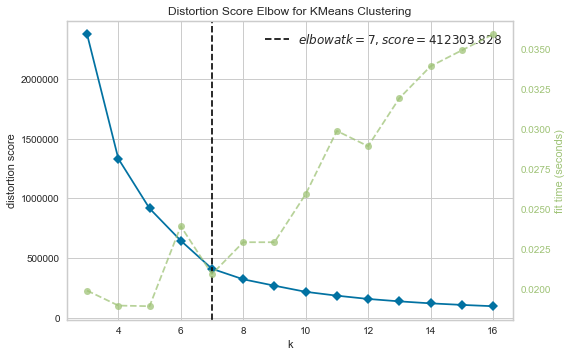

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X)
visualizer.poof()

In [ ]:
"""
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()"""

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [9]:
from sklearn.cluster import AgglomerativeClustering

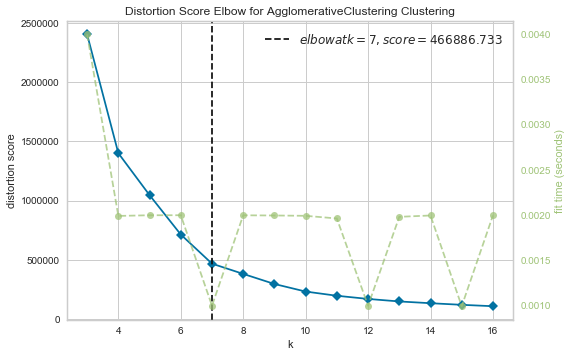

In [10]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [ ]:
from sklearn.datasets import make_blobs

In [37]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

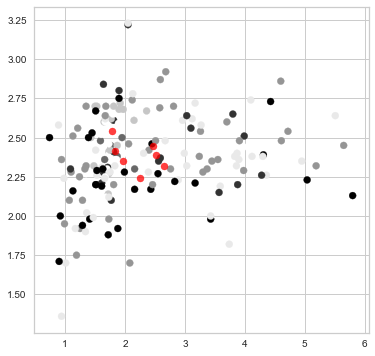

In [35]:
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(X)
preds = cluster.fit_predict(X)


plt.figure(figsize=(6,6))
plt.scatter(X.iloc[:,1],X.iloc[:,2], c=preds)

centers = cluster.cluster_centers_ 
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=50, alpha=0.75)

plt.show()

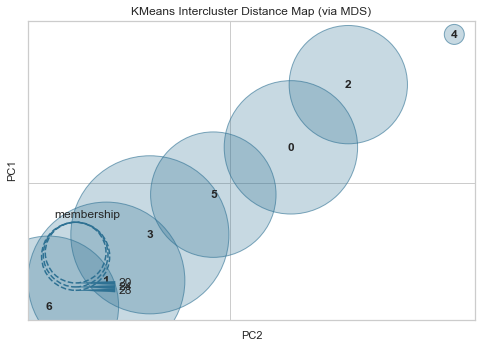

In [44]:
from yellowbrick.cluster import InterclusterDistance
model = InterclusterDistance(KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1))
model.fit(X)
model.poof()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [59]:
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

In [60]:
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.99, whiten=True)

x_pca = pca.fit_transform(x)

x_pca.shape


(178, 12)

In [69]:
set(preds)

{0, 1, 2, 3, 4, 5, 6}

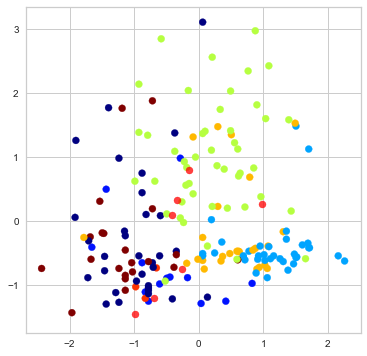

In [74]:
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(x)
preds = cluster.fit_predict(x)

cmap = plt.cm.get_cmap('jet',8)

plt.figure(figsize=(6,6))
plt.scatter(x[:,0],x[:,1], c=preds, cmap=cmap)

centers = cluster.cluster_centers_ 
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=50, alpha=0.75)

plt.show()

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.